# Mandelbrot set
This notebook generates the results used in the report for the first assignment of the course 'Stochastic Simulation'.

**Authors**:

1. Divya
- Affiliation: MSc Computational Science, University of Amsterdam
- Email: 
- Student Number: 

2. K. López
- Affiliation: MSc Computational Science, University of Amsterdam
- Email: kenia.lopez.sotomayor@student.uva.nl
- Student Number: 12965081

3. T. Glansdorp
- Affiliation: MSc Computational Science, University of Amsterdam
- Email: thomas.glansdorp@student.uva.nl
- Student Number: 12748587

## Section 1: Implementation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

The Mandelbrot set is the set of those complex numbers c for which the function z = z * z + c does not go to infinite. 
A high number of iterations indicates slower divergence and a point that stays within bounds. 
This means that for these points, the iterative function z takes more iterations before determining that the point diverges and moves away from the set.

https://github.com/KeniaLS/Stoc_Sim_Assignment1.gitgit 

Approximated area of the Mandelbrot set: 1.518822
The number total number of points within the set: 168758


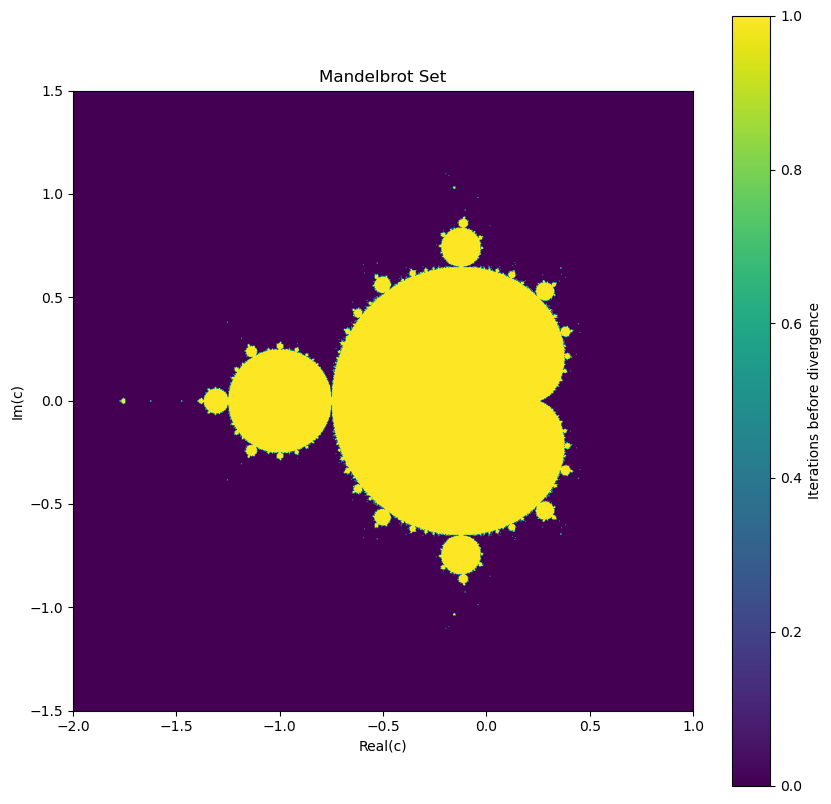

In [2]:
def mandelbrot(c, max_iter):
    '''Function that asseses if the complex number diverges after some number iterations.
    Expects: c and max_iter, a complex number and the maximum number of iterations to check for divergence.
    Modifies: nothing
    Returns: Number boolean True if the complex number does not diverege afeter a max_iter'''
    z = 0
    for n in range(max_iter):
        z = z * z + c
        if abs(z) > 2:  # Check for divergence. If the magnitude of c is greater than 2, abs(z) > 2, then the sequence will diverge to infinity.
            return False  # Point c not in Mandelbrot set
        
    return True  # Point c in Mandelbrot set


def mandelbrot_plot():
    max_iter = 255
    x_min, x_max = -2.0, 1.0
    y_min, y_max = -1.5, 1.5
    width, height = 1000, 1000 #Resolution of the image


    total_points = width * height
    points_inside_set = 0

    mandelbrot_image = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            real = x * (x_max - x_min) / (width - 1) + x_min
            imag = y * (y_max - y_min) / (height - 1) + y_min
            c = complex(real, imag)

            mandelbrot_image[x, y] = mandelbrot(c, max_iter)

            if mandelbrot(c, max_iter) == True:
                points_inside_set += 1

    area_ratio = points_inside_set / total_points
    total_area = (x_max - x_min) * (y_max - y_min)
    estimated_area = area_ratio * total_area
    A_M = estimated_area


    print (f"Approximated area of the Mandelbrot set: {A_M}")
    print (f"The number total number of points within the set: {points_inside_set}")


    plt.figure(figsize=(10, 10))
    plt.imshow(mandelbrot_image.T, cmap='viridis', extent=(x_min, x_max, y_min, y_max))
    plt.xlabel('Real(c)')
    plt.ylabel('Im(c)')
    plt.title('Mandelbrot Set')
    plt.colorbar(label='Iterations before divergence')
    plt.show()

    #estimated_area, points_inside = mandelbrot_area(1000)
    #print("Estimated Area:", estimated_area)
    #print("Points Inside Mandelbrot Set:", points_inside)

mandelbrot_plot()


In [3]:
def mandelbrot_area_by_Montecarlo_Integration():
    
    num_it = np.linspace(1, 300, 24)
    num_it = [int(i) for i in num_it]

    num_N = np.linspace(1, 100, 24)
    num_N = [int(j) for j in num_N]

    areas_estimation = []
    
    for i, j in zip(num_N, num_it):

        N = i
        max_iter = j
        points_in_Mandelbrot_set = 0
        for n in range(N):
            real_part = np.random.uniform(-2, 0.5)
            imag_part = np.random.uniform(-1.5, 1.5)
            
            if mandelbrot(complex(real_part, imag_part), max_iter) == True:
                points_in_Mandelbrot_set += 1

        # Calculate the area estimation
        complex_plane_area = (0.5-(-2))*(1.5-(-1.5)) # As the range is -2 to 0.5 in real and -1.5 to 1.5 in imaginary
        area_Mandelbrot_set = points_in_Mandelbrot_set * complex_plane_area / N
            
        A_i_s = area_Mandelbrot_set
        areas_estimation.append(A_i_s)

    areas_estimation_array = np.array(areas_estimation)
    num_it = np.array(num_it)
    num_N = np.array(num_N)
    return areas_estimation_array, num_N, num_it


        #print ("Estimated area of the Mandelbrot set by Montecarlo integration: " + str(A_i_s))
        #print ("The number of points s, randomly chosen, that fall within the the set out of N: " + str(points_in_Mandelbrot_set))

mandelbrot_area_by_Montecarlo_Integration()



(array([7.5       , 0.        , 1.66666667, 0.57692308, 0.41666667,
        1.36363636, 1.44230769, 1.20967742, 1.71428571, 1.15384615,
        2.21590909, 1.40625   , 1.875     , 1.60714286, 1.2295082 ,
        1.26923077, 1.52173913, 1.01351351, 2.01923077, 1.64634146,
        1.46551724, 1.73076923, 1.42105263, 1.425     ]),
 array([  1,   5,   9,  13,  18,  22,  26,  31,  35,  39,  44,  48,  52,
         56,  61,  65,  69,  74,  78,  82,  87,  91,  95, 100]),
 array([  1,  14,  27,  40,  53,  66,  79,  92, 105, 118, 131, 144, 157,
        170, 183, 196, 209, 222, 235, 248, 261, 274, 287, 300]))

In [4]:
def mandelbrot(c, max_iter):
    """c: number
       max_iter: maximum number of iteration
       
       Returns
       True/False: 
    """
    z = 0
    for n in range(max_iter):
        z = z * z + c
        if abs(z) > 2:          # Check for divergence. If the magnitude of c is greater than 2, abs(z) > 2, then the sequence will diverge to infinity.
            return False        # Point c not in Mandelbrot set
        
    return True  # Point c in Mandelbrot set

In [5]:
num_iters= range(1, 1000, 2)     ## range of values for changing the No. of iterations
samples  = 50                  ## sample size
area_square = 3*3                  ## area of the square in which we are taking a samples
based_iter    = []
for iters in num_iters:
    num_points_mandel = 0
    x_point = uniform.rvs(-2, 3, size=samples)
    y_point = uniform.rvs(-1.5, 3, size=samples)
    for x,y in zip(x_point, y_point):
        c = complex(x, y)
        if mandelbrot(c, iters) == True:
            num_points_mandel += 1
    area = num_points_mandel * area_square/samples
    based_iter.append(area) 